In [7]:
from sklearn.datasets import make_blobs
import pandas as pd


In [12]:
cd /Users/VSR/Desktop/Capstone

/Users/VSR/Desktop/Capstone


In [3]:
features, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)



In [8]:
df = pd.DataFrame(features, columns=['Feature1', 'Feature2'])
df['TrueLabels'] = true_labels



In [13]:
# Export the DataFrame to CSV
df.to_csv('kmeans_dataset.csv', index=False)

print("Dataset exported to kmeans_dataset.csv")

Dataset exported to kmeans_dataset.csv


In [11]:
df.head()

,Feature1,Feature2,TrueLabels
0,0.428577,4.973997,0
1,1.619909,0.067645,1
2,1.432893,4.376792,0
3,-1.578462,3.034458,2
4,-1.658629,2.267460,2


In [14]:
features[:5]

array([[ 0.42857674,  4.9739971 ],
       [ 1.61990909,  0.06764529],
       [ 1.43289271,  4.37679234],
       [-1.57846247,  3.03445802],
       [-1.65862863,  2.26746029]])

In [15]:
true_labels[:5]

array([0, 1, 0, 2, 2])

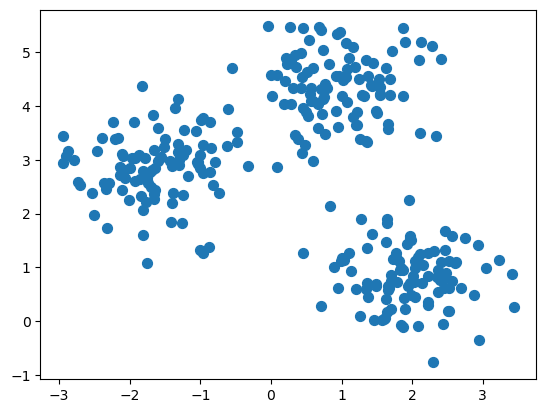

In [17]:
import matplotlib.pyplot as plt
plt.scatter(features[:, 0], features[:, 1], s=50);

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [21]:
scaled_features[:5]

array([[-0.00288843,  1.46120589],
       [ 0.73445459, -1.67573046],
       [ 0.61870585,  1.07937569],
       [-1.2450912 ,  0.22113774],
       [-1.29470788, -0.26925169]])

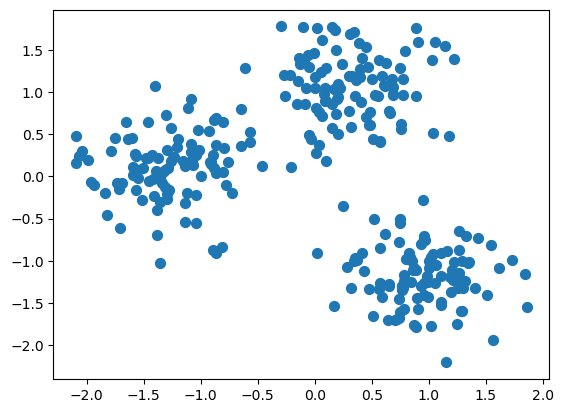

In [22]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=50);

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans( init="random", n_clusters=4,random_state=42)


In [24]:
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)


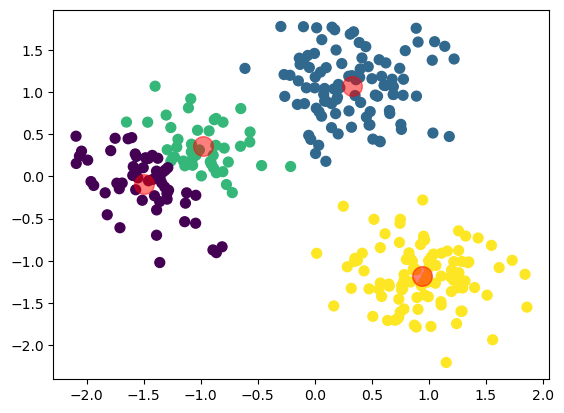

In [25]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans,
s=50, cmap='viridis')
#getting the coordinates of the centers
centers = kmeans.cluster_centers_
#plotting the centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [28]:
kmeans_kwargs = {"init": "random", "random_state": 42}
sse = []
           #computing the SSE for different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) 
    kmeans.fit(scaled_features) 
    sse.append(kmeans.inertia_)#getting the SSE

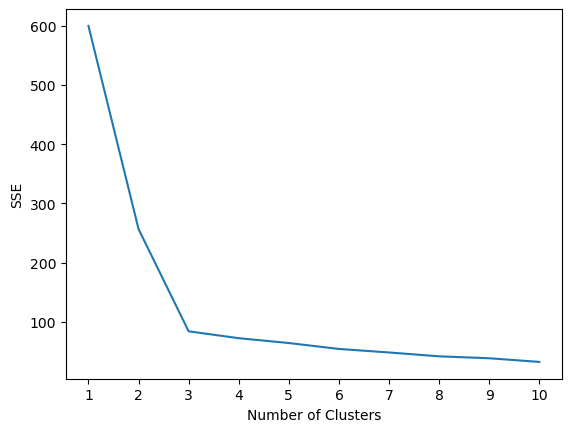

In [31]:
plt.plot(range(1, 11), sse) 
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()